## Univariate Histogram for Numerical Variables

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [2]:
# Extract Data
pokemon = pd.read_csv('../../Datasets/pokemon.csv')

pokemon.head()

,id,species,generation_id,height,weight,base_experience,type_1,type_2,hp,attack,defense,speed,special-attack,special-defense
0,1,bulbasaur,1,0.7,6.9,64,grass,poison,45,49,49,45,65,65
1,2,ivysaur,1,1.0,13.0,142,grass,poison,60,62,63,60,80,80
2,3,venusaur,1,2.0,100.0,236,grass,poison,80,82,83,80,100,100
3,4,charmander,1,0.6,8.5,62,fire,NaN,39,52,43,65,60,50
4,5,charmeleon,1,1.1,19.0,142,fire,NaN,58,64,58,80,80,65


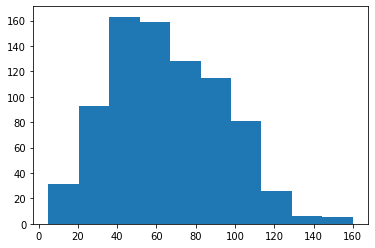

In [3]:
# Plot a Histogram for speed of pokemon
plt.hist(data=pokemon, x='speed');

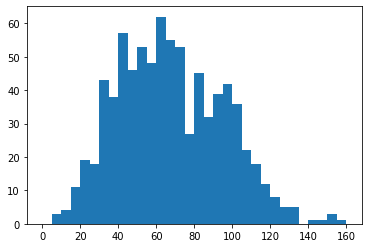

In [4]:
# set up bins
bins = np.arange(0, pokemon.speed.max()+5, 5)
plt.hist(data=pokemon, x='speed', bins=bins);

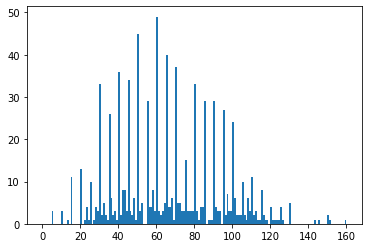

In [5]:
# set up bins
bins = np.arange(0, pokemon.speed.max()+1, 1)
plt.hist(data=pokemon, x='speed', bins=bins);

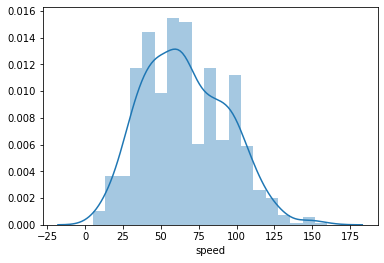

In [6]:
# Histogram Using Seaborn Library
sb.distplot(pokemon['speed'])

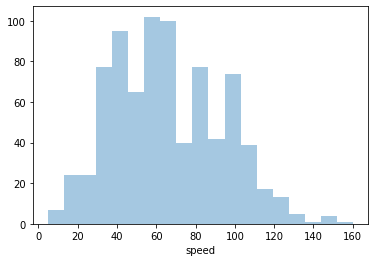

In [7]:
# turning off the density parameter using attribute kde
sb.distplot(pokemon['speed'], kde=False)

### Object Oriented Approach for plotting Histogram

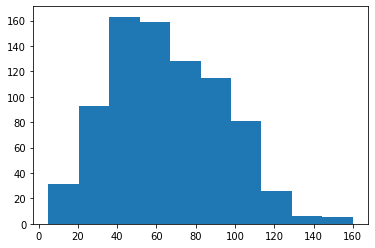

In [8]:
# Using Object Oriented Approch
# 1. Create a figure
# 2. Add an axes to the figure
# 3. Plot the data inside an axes
fig = plt.figure()
ax = fig.add_axes([.125, .125, .775, .755])
ax.hist(data=pokemon, x='speed');

### Creating Subplots

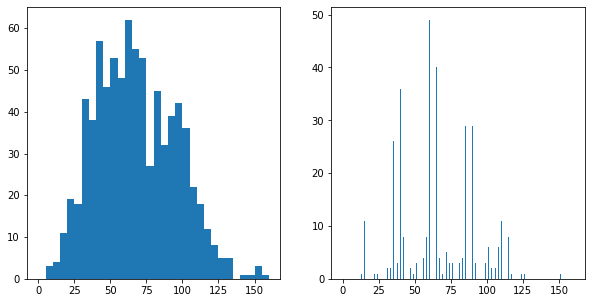

In [9]:
fig = plt.figure(figsize=[10, 5])
ax = fig.add_axes([.125, .125, .775, .755])

plt.subplot(1, 2, 1)

bin_edges = np.arange(0, pokemon['speed'].max()+5, 5)
plt.hist(data=pokemon, x='speed', bins=bin_edges);

plt.subplot(1, 2, 2)

bin_edges = np.arange(0, pokemon['speed'].max()+1/4, 1/4)
plt.hist(data=pokemon, x='speed', bins=bin_edges);

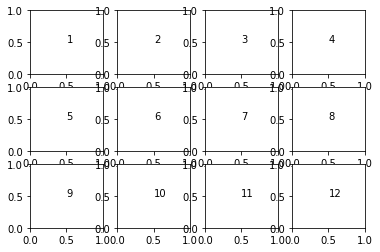

In [10]:
fig, axes = plt.subplots(3, 4) # grid of 3x4 subplots
axes = axes.flatten() # reshape from 3x4 array into 12-element vector

for i in range(12):
    plt.sca(axes[i]) # set the current Axes
    plt.text(0.5, 0.5, i+1) # print conventional subplot index number to middle of Axes

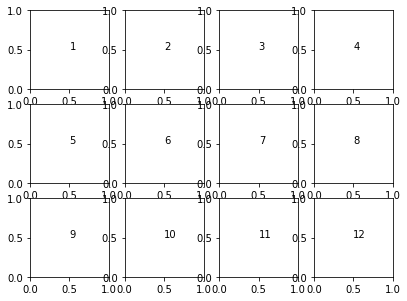

In [11]:
# How to give figsize in plt.subplots()
fig, ax = plt.subplots(nrows=3, ncols=4, figsize=(6.5, 4.9))  # default figsize = [6.4, 4.8]
ax = ax.flatten()

for i in range(12):
    plt.sca(ax[i]) # set the current Axes(activate this axis)
    plt.text(0.5, 0.5, i+1)

### Choosing a Plot for Discrete Data

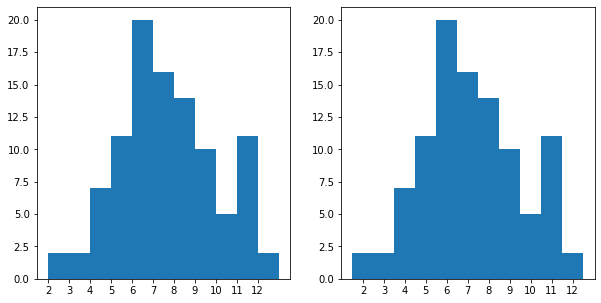

In [12]:
# generate random die roll
import random
random.seed(1)
roll1 = np.array([random.randint(1, 6) for _ in range(100)])
roll2 = np.array([random.randint(1, 6) for _ in range(100)])

roll1_roll2 = roll1 + roll2
fig = plt.figure(figsize=[10,5])

plt.subplot(1,2,1)
bin_edges = np.arange(2, 12+1.1, 1)   # 2 to 13
plt.hist(roll1_roll2, bins=bin_edges)
plt.xticks(np.arange(2, 12+1, 1));  # 2 to 12

plt.subplot(1, 2, 2)
bin_edges = np.arange(1.5, 12.5+1, 1)  # 1.5 to 12.5
plt.hist(roll1_roll2, bins=bin_edges)
plt.xticks(np.arange(2, 12+1, 1));

You'll notice for the left histogram, in a deviation from the examples that have come before, I've added 1.1 to the max value (12) for setting the bin edges, rather than just the desired bin width of 1. 

Recall that data that is equal to the rightmost bin edge gets lumped in to the last bin. This presents a potential problem in perception when a lot of data points take the maximum value, and so is especially relevant when the data takes on discrete values. 
The 1.1 adds an additional bin to the end to store the die rolls of value 12 alone, to avoid having the last bar catch both 11 and 12.

Alternatively to the histogram, consider if a bar chart with non-connected bins might serve your purposes better. The plot below takes the code from before, but adds the "rwidth" parameter to set the proportion of the bin widths that will be filled by each histogram bar.

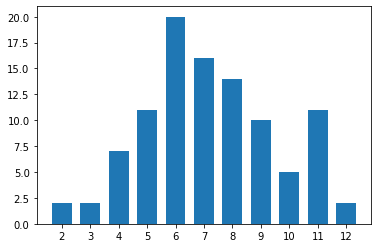

In [13]:
bin_edges = np.arange(1.5, 12.5+1, 1)  # 1.5 to 12.5
plt.hist(roll1_roll2, bins=bin_edges, rwidth=0.7)
plt.xticks(np.arange(2, 12+1, 1));

With "rwidth" set to 0.7, the bars will take up 70% of the space allocated by each bin, with 30% of the space left empty. This changes the default display of the histogram (which you could think of as "rwidth = 1") into a bar chart.

By adding gaps between bars, you emphasize the fact that the data is discrete in value. On the other hand, plotting your quantitative data in this manner might cause it to be interpreted as ordinal-type data, which can have an effect on overall perception.

**NOTE:**

* By adding gaps between bars, you emphasize the fact that the data is discrete in value. On the other hand, plotting your quantitative data in this manner might cause it to be interpreted as ordinal-type data, which can have an effect on overall perception.

* For continuous numeric data, you should not make use of the "rwidth" parameter, since the gaps imply discreteness of value. 

* As another caution, it might be tempting to use seaborn's countplot function to plot the distribution of a discrete numeric variable as bars. Be careful about doing this, since each unique numeric value will get a bar, regardless of the spacing in values between bars. (For example, if the unique values were {1, 2, 4, 5}, missing 3, countplot would only plot four bars, with the bars for 2 and 4 right next to one another.) 

* Also, even if your data is technically discrete numeric, you should probably not consider either of the variants depicted on this page unless the number of unique values is small enough to allow for the half-unit shift or discrete bars to be interpretable. 

* If you have a large number of unique values over a large enough range, it's better to stick with the standard histogram than risk interpretability issues.

* While you might justify plotting discrete numeric data using a bar chart, you’ll be less apt to justify the opposite: plotting ordinal data as a histogram. The space between bars in a bar chart helps to remind the reader that values are not contiguous in an ‘interval’-type fashion: only that there is an order in levels. With that space removed as in a histogram, it's harder to remember this important bit of interpretation.

### Descriptive Stats, Outliers and Axis Limits

In [14]:
pokemon.head()

,id,species,generation_id,height,weight,base_experience,type_1,type_2,hp,attack,defense,speed,special-attack,special-defense
0,1,bulbasaur,1,0.7,6.9,64,grass,poison,45,49,49,45,65,65
1,2,ivysaur,1,1.0,13.0,142,grass,poison,60,62,63,60,80,80
2,3,venusaur,1,2.0,100.0,236,grass,poison,80,82,83,80,100,100
3,4,charmander,1,0.6,8.5,62,fire,NaN,39,52,43,65,60,50
4,5,charmeleon,1,1.1,19.0,142,fire,NaN,58,64,58,80,80,65


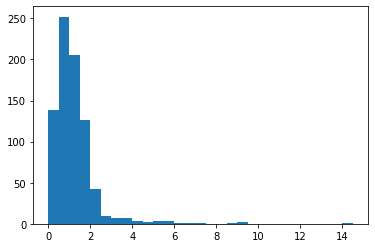

In [15]:
bin_range = np.arange(0, pokemon.height.max()+0.5, 0.5)  # 0 - 14.5

plt.hist(pokemon.height, bins=bin_range);

(0, 6)

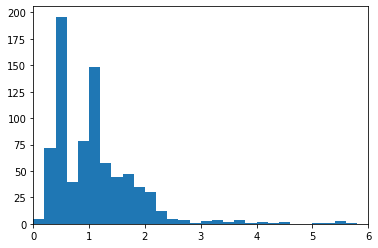

In [16]:
bin_range = np.arange(0, pokemon.height.max()+0.2, 0.2) # 0 - 14.6

plt.hist(pokemon.height, bins=bin_range);
plt.xlim((0, 6))

**NOTE:** 
The histogram states that most of the pokemon height lie between a range of 0.2 to 2. Also, only few of the pokemon have a height as tall as human.

### Scales and Transformation

In [17]:
print(pokemon.weight.describe())

count    807.000000
mean      61.771128
std      111.519355
min        0.100000
25%        9.000000
50%       27.000000
75%       63.000000
max      999.900000
Name: weight, dtype: float64


In [18]:
np.log10(pokemon.weight.describe())

count    2.906874
mean     1.790786
std      2.047350
min     -1.000000
25%      0.954243
50%      1.431364
75%      1.799341
max      2.999957
Name: weight, dtype: float64

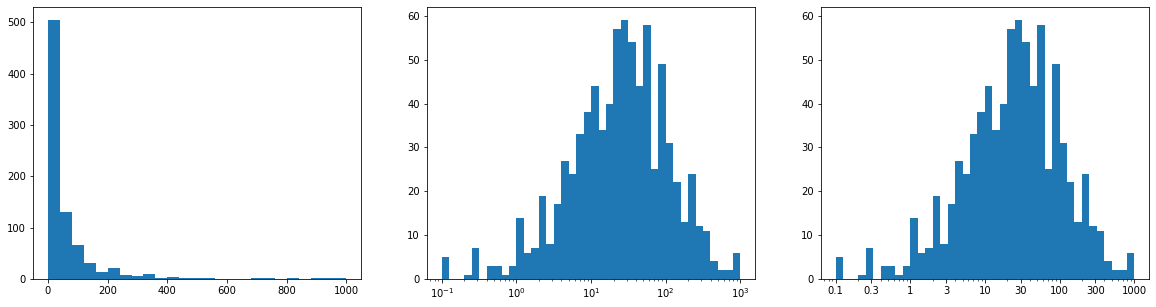

In [19]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=[20,5])

plt.sca(ax[0])
bin_range = np.arange(0, pokemon.weight.max()+40, 40) # 0 - 1000
plt.hist(pokemon.weight, bins=bin_range);


plt.sca(ax[1])
bin_range = 10 ** np.arange(-1, 3 + 0.1, 0.1)
plt.hist(pokemon.weight, bins=bin_range);
plt.xscale('log')

plt.sca(ax[2])
bin_range = 10 ** np.arange(-1, 3 + 0.1, 0.1)
ticks = [0.1, 0.3, 1, 3, 10, 30, 100, 300, 1000]
labels = [v for v in ticks]
plt.hist(pokemon.weight, bins=bin_range);
plt.xscale('log')
plt.xticks(ticks, labels);

### KDE (Kernel Density Estimation)

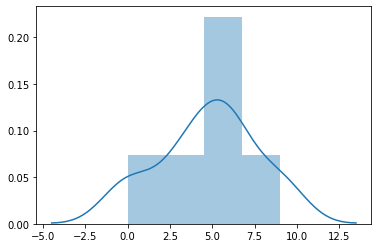

In [20]:
data = [0.0, 3.0, 4.5, 5.8, 6.2, 9.0]
sb.distplot(data)

Kernel density estimation is one way of estimating the probability density function of a variable. In a KDE plot, you can think of each observation as replaced by a small ‘lump’ of area. Stacking these lumps all together produces the final density curve. The default settings use a normal-distribution kernel, but most software that can produce KDE plots also include other kernel function options.

Seaborn's distplot function calls another function, **kdeplot**, to generate the KDE. The demonstration code below also uses a third function called by **distplot** for illustration, **rugplot**. In a rugplot, data points are depicted as dashes on a number line.

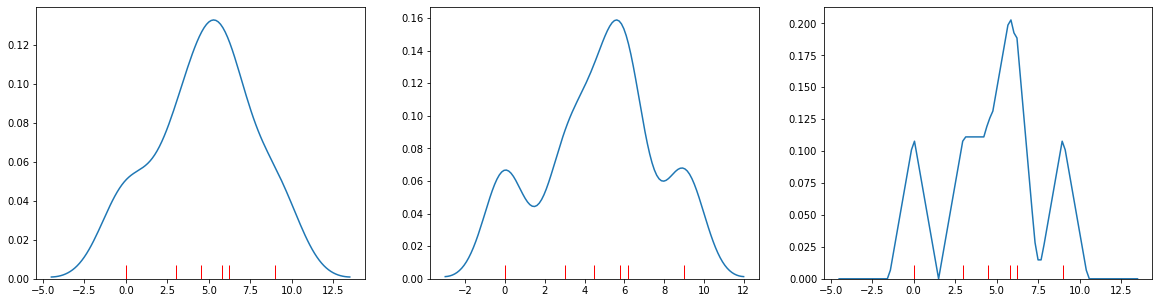

In [21]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=[20,5])

# left plot: showing kde lumps with the default settings
fig.sca(ax[0])
sb.distplot(data, hist=False, rug=True, rug_kws={'color':'red'})

# central plot: kde with narrow bandwidth to show individual probability lumps
fig.sca(ax[1])
sb.distplot(data, hist = False, rug = True, rug_kws = {'color' : 'r'}, kde_kws = {'bw' : 1})

# right plot: choosing a different, triangular kernel function (lump shape)
fig.sca(ax[2])
sb.distplot(data, hist=False, rug=True, rug_kws={'color':'r'}, kde_kws = {'bw':1.5, 'kernel':'tri'})

Interpreting proportions from this plot type is slightly trickier than a standard histogram: the vertical axis indicates a density of data rather than straightforward proportions. Under a KDE plot, the total area between the 0-line and the curve will be 1. The probability of an outcome falling between two values is found by computing the area under the curve that falls between those values. Making area judgments like this without computer assistance is difficult and likely to be inaccurate.

Despite the fact that making specific probability judgments are not as intuitive with KDE plots as histograms, there are still reasons to use kernel density estimation. If there are relatively few data points available, KDE provides a smooth estimate of the overall distribution of data. These ideas may not be so easily conveyed through histograms, in which the large discreteness of jumps may end up misleading.

It should also be noted that there is a bandwidth parameter in KDE that specifies how wide the density lumps are. Similar to bin width for histograms, we need to choose a bandwidth size that best shows the signal in the data. A too-small bandwidth can make the data look noisier than it really is, and a too-large bandwidth can smooth out useful features that we could use to make inferences about the data. It’s good to keep this in mind in case the default bandwidths chosen by your visualization software don’t look quite right or if you need to perform further investigations.

### Waffle Plots

In [22]:
pokemon.head()

,id,species,generation_id,height,weight,base_experience,type_1,type_2,hp,attack,defense,speed,special-attack,special-defense
0,1,bulbasaur,1,0.7,6.9,64,grass,poison,45,49,49,45,65,65
1,2,ivysaur,1,1.0,13.0,142,grass,poison,60,62,63,60,80,80
2,3,venusaur,1,2.0,100.0,236,grass,poison,80,82,83,80,100,100
3,4,charmander,1,0.6,8.5,62,fire,NaN,39,52,43,65,60,50
4,5,charmeleon,1,1.1,19.0,142,fire,NaN,58,64,58,80,80,65


There's no built-in function for waffle plots in Matplotlib or Seaborn, so we'll need to take some additional steps in order to build one with the tools available. 

First, we need to create a function to decide how many blocks to allocate to each category. The function below, percentage_blocks, uses a rule where each category gets a number of blocks equal to the number of full percentage points it covers. The remaining blocks to get to the full one hundred are assigned to the categories with the largest fractional parts.

In [23]:
def percentage_blocks(df, vars):
    """
    Take as input a dataframe and variable, and return a Pandas series with
    approximate percentage values for filling out a waffle plot.
    """
    # compute base quotas
    percentages = 100 * df[vars].value_counts() / df.shape[0]
    before_dec = np.floor(percentages).astype(int) # integer part = minimum quota
    after_dec = (percentages - before_dec).sort_values(ascending=False)

    # add in additional counts to reach 100
    rem = 100 - before_dec.sum()
    for i in after_dec.index[:rem]:
        before_dec[i] += 1
    return before_dec

Now it's time to actually plot those counts as boxes in the waffle plot form. To do this, we'll make use of Matplotlib's bar function. We could have used this function earlier in the lesson to create our bar charts instead of Seaborn's countplot, but it would have required us to aggregate the data first to get the height of each bar. For the case of the waffle plot, we're going to specify the x- and y- coordinates of the boxes, and set their widths and heights to be equal, to create squares. The initial plotting code looks like this:

-----
The last steps that we need to do involve aesthetic cleaning to polish it up for interpretability. We can take away the plot border and ticks, since they're arbitrary, but we should change the limits so that the boxes are square. We should also add a legend so that the mapping from colors to category levels is clear.

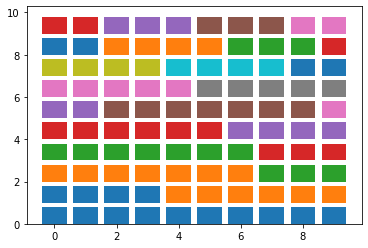

In [24]:
waffle_counts = percentage_blocks(pokemon, 'type_1')

prev_count = 0
# for each category,
for cat in range(waffle_counts.shape[0]):
    # get the block indices
    blocks = np.arange(prev_count, prev_count + waffle_counts[cat])
    # and put a block at each index's location
    x = blocks % 10 # use mod operation to get ones digit
    y = blocks // 10 # use floor division to get tens digit
    plt.bar(x = x, height = 0.8, width = 0.8, bottom = y)
    prev_count += waffle_counts[cat]

The two calls to Matplotlib's axis function make use of two convenience strings for arguments: 'off' removes the axis lines, ticks, and labels, while 'square' ensures that the scaling on each axis is equal within a square bounding box. As for the legend call, the first argument is a list of categories as obtained from the sorted waffle_counts Series variable. This will match each category to each bar call, in order. The "bbox_to_anchor" argument sets an anchor for the legend to the right side of the plot, and "loc = 6" positions the anchor to the center left of the legend. The final plot is as it looks at the top of the page:

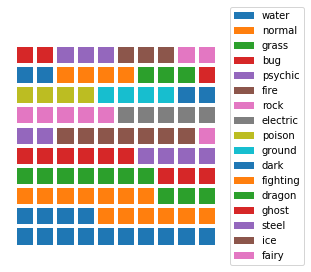

In [25]:
waffle_counts = percentage_blocks(pokemon, 'type_1')

prev_count = 0
# for each category,
for cat in range(waffle_counts.shape[0]):
    # get the block indices
    blocks = np.arange(prev_count, prev_count + waffle_counts[cat])
    # and put a block at each index's location
    x = blocks % 10 # use mod operation to get ones digit
    y = blocks // 10 # use floor division to get tens digit
    plt.bar(x = x, height = 0.8, width = 0.8, bottom = y)
    prev_count += waffle_counts[cat]

# aesthetic wrangling
waff = waffle_counts[waffle_counts > 0]
plt.legend(waff.index, bbox_to_anchor = (1, 0.5), loc = 6)
plt.axis('off')
plt.axis('square');

**External Modules**

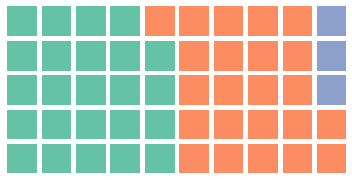

In [26]:
from pywaffle import Waffle

fig = plt.figure(
    FigureClass=Waffle, 
    rows=5, 
    columns=10, 
    values=[48, 46, 6],
    figsize=(5, 3)  # figsize is a parameter of matplotlib.pyplot.figure
)
plt.show()

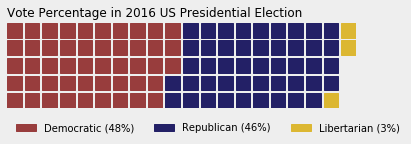

In [27]:
data = {'Democratic': 48, 'Republican': 46, 'Libertarian': 3}
fig = plt.figure(
    FigureClass=Waffle, 
    rows=5, 
    values=data, 
    colors=("#983D3D", "#232066", "#DCB732"),
    title={'label': 'Vote Percentage in 2016 US Presidential Election', 'loc': 'left'},
    labels=["{0} ({1}%)".format(k, v) for k, v in data.items()],
    legend={'loc': 'lower left', 'bbox_to_anchor': (0, -0.4), 'ncol': len(data), 'framealpha': 0},
    starting_location='NW'
)
fig.set_facecolor('#EEEEEE')
plt.show()

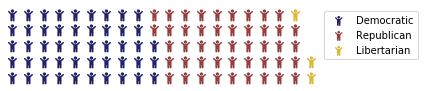

In [29]:
data = {'Democratic': 48, 'Republican': 46, 'Libertarian': 3}
fig = plt.figure(
    FigureClass=Waffle, 
    rows=5, 
    values=data, 
    colors=("#232066", "#983D3D", "#DCB732"),
    legend={'loc': 'upper left', 'bbox_to_anchor': (1, 1)},
    icons='child', 
    font_size=12, 
    icon_legend=True
)